In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data_menu = pd.read_csv("data_menu.csv")

In [3]:
def section_trt(x):
    x = x.replace("NOS", "")
    if "TACOS" in x: return 'TACOS'
    if "PIZZA" in x: return "PIZZA"
    if "BURGER" in x: return "BURGER"
    if "SANDWICHS" in x: return "SANDWICHS"
    if 'SALADES' in  x: return 'SALADES'
    if "PANINIS" in x : return "PANINIS"
    if "SASHIMI" in x or "ROLL" in x or "MAKI" in x: return "THAI"
    if "BOISSONS" in x or 'MOJITOS' in x: return "BOISSONS"
    if "ENTR" in x : return "ENTREES"
    if "P" in x and "TES" in x : return "PATES"
    if "LES PLUS COMMANDÉS"in x: return "TOP"
    if "PLATS"  in x : return "PLATS"
    if "OMELETTES" in x : return x
    if "DESSERTS" in x : return "DESSERTS"
    if "FRITES" in x : return "FRITES"
    return "OTHER"
data_menu["section_trt"] = data_menu["section"].apply(section_trt)

In [4]:
def prix_trt(x):
    x = x.replace(" DA", "")
    x = x.replace(".", "")
    return(float(x)/1000)
data_menu["price_trt"] = data_menu["price"].apply(prix_trt)

In [5]:
def rating_trt(x):
    x = x.split()[0]
    return float(x)
data_menu["rating_trt"] = data_menu["resume"].apply(rating_trt)

In [6]:
le = LabelEncoder()
data_menu["restaurant_trt"] = le.fit_transform(data_menu["restaurant"])

In [7]:
data = data_menu[["section_trt", "price_trt", "rating_trt", "restaurant_trt"]]
data = pd.get_dummies(data)

<AxesSubplot:>

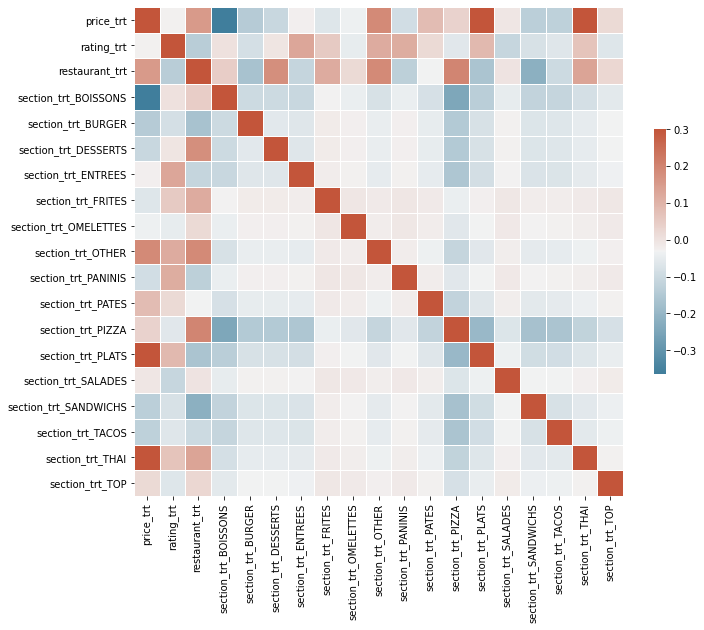

In [26]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<BarContainer object of 16 artists>

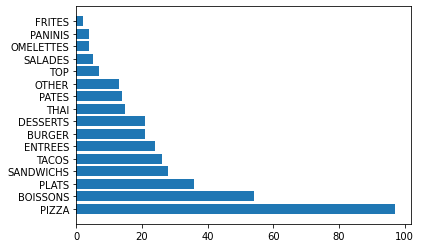

In [8]:
x = data_menu["section_trt"].value_counts().index
y = data_menu["section_trt"].value_counts().values
plt.barh(x, y)

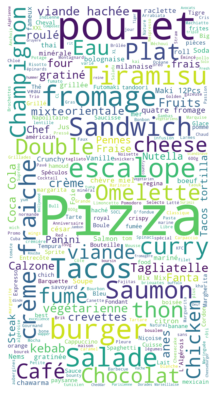

In [15]:
text = " ".join([ele for ele in data_menu["product"].values])
stop_words = set(stopwords.words('french'))
stop_words.add("Le")
stop_words.add("de")
stop_words.add("aux")

wordcloud = WordCloud(background_color= "white", 
                    max_words= 1000, 
                    width = 800, 
                    height = 1500,
                    stopwords= stop_words)
wordcloud.generate(text)

# Display the generated image:
plt.figure(figsize= (10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
data_menu.pivot_table(index = ["section_trt", "restaurant"],
                    values = "price_trt")

price_trt
section_trt restaurant                                 
BOISSONS    Anes Food Family                   0.125385
            Central Up                         0.100000
            L'Avenue                           0.388095
            La Marguerite                      0.090000
            O'Tacos                            0.112500
            Pizza Nostra Feu de Bois Cheraga   0.085000
BURGER      Anes Food Family                   0.335714
            Baba Aroudj-Djelloul               0.200000
            Central Up                         0.439091
DESSERTS    L'Avenue                           0.523077
            O'Tacos                            0.300000
ENTREES     Anes Food Family                   0.454167
            L'Avenue                           0.885714
            La Cité Asiatique                  0.620000
FRITES      O'Tacos                            0.200000
OMELETTES   L'Avenue                           0.475000
OTHER       Baba Aroudj-Djelloul               0.350000
            La Cité Asiatique                  2.500000
            La Marguerite                      0.525000
            O'Tacos                            0.662500
PANINIS     Anes Food Family                   0.225000
PATES       Anes Food Family                   0.775000
            L'Avenue                           0.868750
            La Cité Asiatique                  1.100000
PIZZA       Anes Food Family                   0.597368
            Central Up                         0.704348
            L'Avenue                           0.720000
            La Marguerite                      0.675000
            Pizza Nostra Feu de Bois Cheraga   0.759048
PLATS       Anes Food Family                   0.955882
            L'Avenue                           1.792105
SALADES     Central Up                         0.240000
            L'Avenue                           0.900000
SANDWICHS   Anes Food Family                   0.317857
            Central Up                         0.542857
TACOS       Anes Food Family                   0.530000
            Central Up                         0.225000
            O'Tacos                            0.800000
THAI        La Cité Asiatique                  1.560000
TOP         L'Avenue                           0.735714

<AxesSubplot:ylabel='Frequency'>

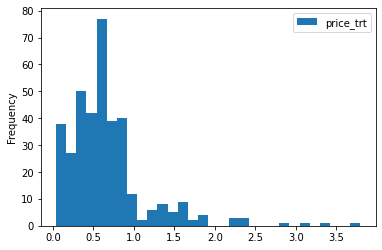

In [19]:
data_menu[["price_trt", "section_trt"]].plot(bins=30, kind="hist")

In [25]:
data

,price_trt,rating_trt,restaurant_trt,section_trt_BOISSONS,section_trt_BURGER,section_trt_DESSERTS,section_trt_ENTREES,section_trt_FRITES,section_trt_OMELETTES,section_trt_OTHER,section_trt_PANINIS,section_trt_PATES,section_trt_PIZZA,section_trt_PLATS,section_trt_SALADES,section_trt_SANDWICHS,section_trt_TACOS,section_trt_THAI,section_trt_TOP
0,0.35,4.4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.17,4.4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.23,4.4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.20,4.4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.90,4.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.10,3.7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,0.10,3.7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
368,0.10,3.7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369,0.10,3.7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
